In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/MyDrive/Colab Notebooks'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from preparing import ImageGenerator, train, test

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 64
max_dimension = 512
n_classes = 7

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
 
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128 , kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128),
 
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            nn.BatchNorm2d(256),
             
            nn.AdaptiveAvgPool2d((2,2)),

            
            nn.Flatten(), 
            nn.Linear(256*2*2, 128),
            nn.ReLU(),
            nn.Linear(128, n_classes),
            nn.Softmax()).to(device)

In [ ]:

loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.0002,weight_decay = 0.0001)

In [ ]:
from torchsummary import summary
summary(model,(3,128,128))

In [ ]:
train_image_directory = 'Data/parts_train/right_eye'
valid_image_directory = 'Data/parts_val/right_eye'
train_loader = ImageGenerator(train_image_directory, batch_size=batch_size, shuffle=True, max_dimension=max_dimension)
valid_loader = ImageGenerator(valid_image_directory, batch_size=batch_size, max_dimension=max_dimension)

In [ ]:
epochs=25
path_to_save = 'right_eye.pth'
train_losses, train_accurs, valid_losses, valid_accurs = train(epochs,model,
                                                               train_loader, 
                                                               valid_loader,
                                                               loss_fn, 
                                                               optimizer,
                                                               device,
                                                               path_to_save,
                                                               patience=15)


--------------------
Epoch 1/25


100%|██████████| 38/38 [10:47<00:00, 17.04s/it]


Loss: 1.838 | Accuracy: 31.178
Train Loss: 2.517 | Train Accuracy: 32.458 -- Valid Loss: 1.838 | Accuracy: 31.178
--------------------
Epoch 2/25


100%|██████████| 38/38 [00:05<00:00,  7.27it/s]


Loss: 1.803 | Accuracy: 34.802
Train Loss: 2.335 | Train Accuracy: 35.910 -- Valid Loss: 1.803 | Accuracy: 34.802
--------------------
Epoch 3/25


100%|██████████| 38/38 [00:05<00:00,  7.41it/s]


Loss: 1.801 | Accuracy: 34.555
Train Loss: 2.232 | Train Accuracy: 37.469 -- Valid Loss: 1.801 | Accuracy: 34.555
Valid accuracy does not improve!!!
--------------------
Epoch 4/25


100%|██████████| 38/38 [00:05<00:00,  7.46it/s]


Loss: 1.803 | Accuracy: 34.514
Train Loss: 2.159 | Train Accuracy: 38.460 -- Valid Loss: 1.803 | Accuracy: 34.514
Valid accuracy does not improve!!!
--------------------
Epoch 5/25


100%|██████████| 38/38 [00:05<00:00,  7.35it/s]


Loss: 1.785 | Accuracy: 36.697
Train Loss: 2.106 | Train Accuracy: 39.038 -- Valid Loss: 1.785 | Accuracy: 36.697
--------------------
Epoch 6/25


100%|██████████| 38/38 [00:05<00:00,  7.47it/s]


Loss: 1.786 | Accuracy: 36.862
Train Loss: 2.059 | Train Accuracy: 39.817 -- Valid Loss: 1.786 | Accuracy: 36.862
--------------------
Epoch 7/25


100%|██████████| 38/38 [00:05<00:00,  7.56it/s]


Loss: 1.772 | Accuracy: 38.138
Train Loss: 2.019 | Train Accuracy: 40.457 -- Valid Loss: 1.772 | Accuracy: 38.138
--------------------
Epoch 8/25


100%|██████████| 38/38 [00:05<00:00,  7.42it/s]


Loss: 1.761 | Accuracy: 38.674
Train Loss: 1.987 | Train Accuracy: 40.999 -- Valid Loss: 1.761 | Accuracy: 38.674
--------------------
Epoch 9/25


100%|██████████| 38/38 [00:05<00:00,  7.45it/s]


Loss: 1.762 | Accuracy: 39.456
Train Loss: 1.955 | Train Accuracy: 41.618 -- Valid Loss: 1.762 | Accuracy: 39.456
--------------------
Epoch 10/25


100%|██████████| 38/38 [00:05<00:00,  7.44it/s]


Loss: 1.763 | Accuracy: 39.333
Train Loss: 1.932 | Train Accuracy: 41.877 -- Valid Loss: 1.763 | Accuracy: 39.333
Valid accuracy does not improve!!!
--------------------
Epoch 11/25


100%|██████████| 38/38 [00:05<00:00,  7.32it/s]


Loss: 1.760 | Accuracy: 39.003
Train Loss: 1.907 | Train Accuracy: 42.635 -- Valid Loss: 1.760 | Accuracy: 39.003
Valid accuracy does not improve!!!
--------------------
Epoch 12/25


100%|██████████| 38/38 [00:05<00:00,  7.47it/s]


Loss: 1.758 | Accuracy: 39.580
Train Loss: 1.890 | Train Accuracy: 42.873 -- Valid Loss: 1.758 | Accuracy: 39.580
--------------------
Epoch 13/25


100%|██████████| 38/38 [00:05<00:00,  7.52it/s]


Loss: 1.753 | Accuracy: 40.445
Train Loss: 1.875 | Train Accuracy: 42.966 -- Valid Loss: 1.753 | Accuracy: 40.445
--------------------
Epoch 14/25


100%|██████████| 38/38 [00:05<00:00,  7.50it/s]


Loss: 1.754 | Accuracy: 40.527
Train Loss: 1.859 | Train Accuracy: 43.461 -- Valid Loss: 1.754 | Accuracy: 40.527
--------------------
Epoch 15/25


100%|██████████| 38/38 [00:05<00:00,  7.48it/s]


Loss: 1.746 | Accuracy: 40.486
Train Loss: 1.848 | Train Accuracy: 43.657 -- Valid Loss: 1.746 | Accuracy: 40.486
Valid accuracy does not improve!!!
--------------------
Epoch 16/25


100%|██████████| 38/38 [00:05<00:00,  7.50it/s]


Loss: 1.748 | Accuracy: 41.021
Train Loss: 1.837 | Train Accuracy: 43.900 -- Valid Loss: 1.748 | Accuracy: 41.021
--------------------
Epoch 17/25


100%|██████████| 38/38 [00:05<00:00,  7.45it/s]


Loss: 1.741 | Accuracy: 41.433
Train Loss: 1.828 | Train Accuracy: 44.292 -- Valid Loss: 1.741 | Accuracy: 41.433
--------------------
Epoch 18/25


100%|██████████| 38/38 [00:05<00:00,  7.52it/s]


Loss: 1.735 | Accuracy: 42.010
Train Loss: 1.820 | Train Accuracy: 44.421 -- Valid Loss: 1.735 | Accuracy: 42.010
--------------------
Epoch 19/25


100%|██████████| 38/38 [00:05<00:00,  7.49it/s]


Loss: 1.742 | Accuracy: 41.598
Train Loss: 1.811 | Train Accuracy: 45.076 -- Valid Loss: 1.742 | Accuracy: 41.598
Valid accuracy does not improve!!!
--------------------
Epoch 20/25


100%|██████████| 38/38 [00:05<00:00,  7.48it/s]


Loss: 1.757 | Accuracy: 39.292
Train Loss: 1.810 | Train Accuracy: 44.762 -- Valid Loss: 1.757 | Accuracy: 39.292
Valid accuracy does not improve!!!
--------------------
Epoch 21/25


100%|██████████| 38/38 [00:05<00:00,  7.50it/s]


Loss: 1.749 | Accuracy: 40.980
Train Loss: 1.801 | Train Accuracy: 45.303 -- Valid Loss: 1.749 | Accuracy: 40.980
Valid accuracy does not improve!!!
--------------------
Epoch 22/25


100%|██████████| 38/38 [00:05<00:00,  7.49it/s]


Loss: 1.744 | Accuracy: 40.733
Train Loss: 1.799 | Train Accuracy: 45.200 -- Valid Loss: 1.744 | Accuracy: 40.733
Valid accuracy does not improve!!!
--------------------
Epoch 23/25


100%|██████████| 38/38 [00:05<00:00,  7.48it/s]


Loss: 1.736 | Accuracy: 41.722
Train Loss: 1.795 | Train Accuracy: 45.608 -- Valid Loss: 1.736 | Accuracy: 41.722
Valid accuracy does not improve!!!
--------------------
Epoch 24/25


100%|██████████| 38/38 [00:05<00:00,  7.47it/s]


Loss: 1.739 | Accuracy: 41.474
Train Loss: 1.793 | Train Accuracy: 45.427 -- Valid Loss: 1.739 | Accuracy: 41.474
Valid accuracy does not improve!!!
--------------------
Epoch 25/25


100%|██████████| 38/38 [00:05<00:00,  7.54it/s]

Loss: 1.751 | Accuracy: 40.362
Train Loss: 1.788 | Train Accuracy: 46.031 -- Valid Loss: 1.751 | Accuracy: 40.362
Valid accuracy does not improve!!!
Training complete in 104m 34s
Best val Acc: 42.009885


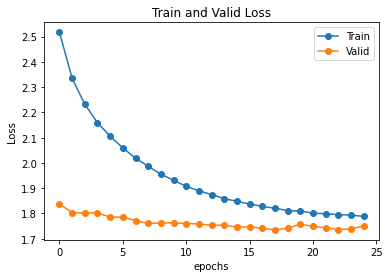

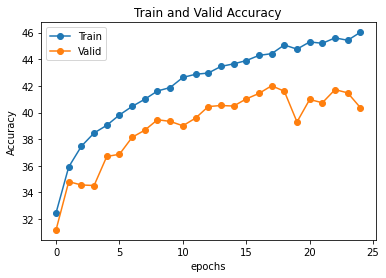

In [ ]:
plt.plot(train_losses, '-o')
plt.plot(valid_losses, '-o')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Loss')
plt.show()

plt.plot(train_accurs, '-o')
plt.plot(valid_accurs, '-o')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Accuracy')
plt.show()